# Logistic Regression for Breast Cancer Classification

In this notebook we will see how to solve a classification problem using logistic regression.

We will use
- The Python library `sckit-learn`
- Using the `datasets` submodule we will import the breast cancer data set
- Using the `model_selection` submodule we will use the method `test_train_split` to split the dataset into training and testing subsets
- Using the `linear_model` submodule create a `LogistricRegression` object to train logistic regression classifier
- We will train this model using the training set
- Predict and evaluate the results of our LogisticRegression model on the test set using `metrics`
- Use `seaborn` to plot relevant model metrics

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

The breast cancer dataset is available in `scikit-learn`. Many machine learning libraries come with built-in datasets or expose an API with which you can download datasets to train and test your model. 

We set the input parameter `as_frame=True` in the `load_breast_cancer()` fuction to return the data as a Pandas dataframe. All of the `sklearn.datasets` behave in a similar fashion.

In [2]:
# Load the breast cancer dataset as a dataframe
bc_dataset = load_breast_cancer(as_frame=True)

The `bc_dataset` is an object. 

To obtain the input features we need to call `bc_dataset["data"]`.

To obtain the output target we need to call `bc_dataset["target"]`.

In [3]:
# X is a Pandas dataframe
# The columns are the features 
X = bc_dataset["data"]

# y is a Pandas series with the target class labels (0 - negative, 1 - positive)
y = bc_dataset["target"]

# Explore these objects with the .head() method

In [4]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
y.head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    1
Name: target, dtype: int32

In [7]:
# Using the train_test_split method we split 80% of the data into the X_train, y_train numpy arrays
# The remaining 20% is our X_test and y_test 
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=10)

In [8]:
# Create a StandardScaler object
sc = StandardScaler()

# The StandardScaler standardizes features by removing the mean and scaling to unit variance
# Prevents features with larger variances to dominate
# We only need to apply this to our training/testing input data
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [9]:
# Create our logistic regression object
logistic_regr = LogisticRegression()

In [10]:
logistic_regr.fit(X_train, y_train)

LogisticRegression()

In [11]:
predictions = logistic_regr.predict(X_test)
print(predictions)

[0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1
 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 1
 1 0 0]


In [12]:
score = logistic_regr.score(X_test, y_test)

In [13]:
print("The accuracy of the model is: ", score)

The accuracy of the model is:  0.956140350877193


In [14]:
# Using the metrics submodule we can compute the 
cm = metrics.confusion_matrix(y_test, predictions)

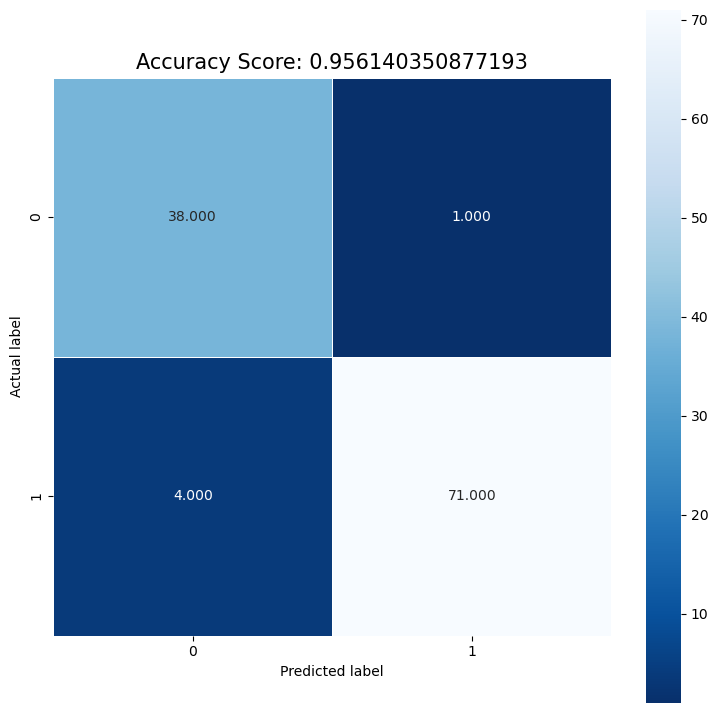

In [15]:
# Using matplotlib and seaborn we can display a heatmap of the
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [16]:
# True positives / (True positives + False positives)
# Quality of a positive prediction
# Answers what proportion of positive identifications were actually correct.
# High precision means not a lot of false positives
precision = metrics.precision_score(y_test, predictions)
print("Precision score: ", precision)

Precision score:  0.9861111111111112


In [17]:
# True positives / (True positives + False Negatives)
# Answers what proportion of the actual positives was correct.
# Higher recall means not a lot of False Negatives
recall = metrics.recall_score(y_test, predictions)
print("Recall score: ", recall)

Recall score:  0.9466666666666667


[1.99999957e+00 9.99999573e-01 5.53043012e-01 5.50249338e-01
 5.16462726e-01 4.91939913e-01 1.07625986e-01 2.33112357e-14]


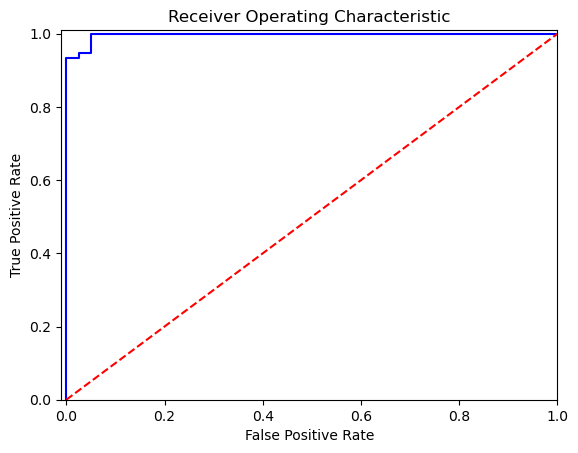

In [18]:
# ROC curve
# fpr = FP / (FP + TN)
# tpr = TP / (TP + FN)
lr_probs = logistic_regr.predict_proba(X_test)
lr_preds = lr_probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, lr_preds)
print(threshold)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()